<a href="https://colab.research.google.com/github/diamond-nicholas/fruit_classification_tensorflow/blob/main/Fruits_classification_tensorflow_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2022-06-01 04:19:28--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  59.2MB/s    in 1.7s    

2022-06-01 04:19:34 (59.2 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [3]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [5]:
img_height, img_width = 32, 32
batch_size =20
train_ds = tf.keras.utils.image_dataset_from_directory('fruits/train',image_size = (img_height, img_width),batch_size = batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory('fruits/validation',image_size = (img_height, img_width),batch_size = batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory('fruits/test',image_size = (img_height, img_width),batch_size = batch_size)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


visualise images and create dataset

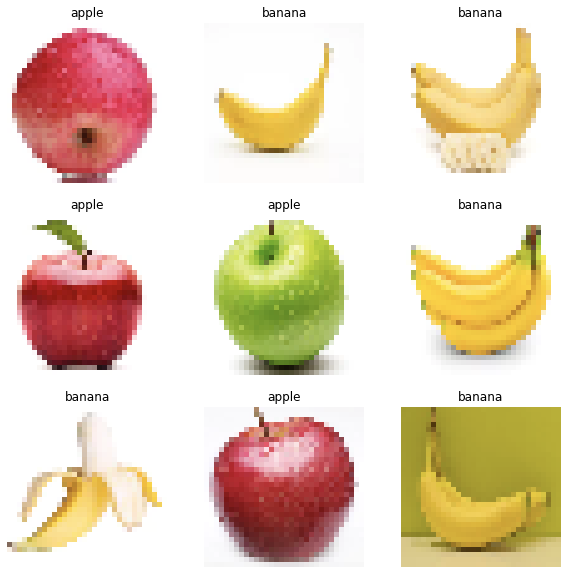

In [6]:
class_names = ['apple', 'banana', 'oranges']
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

Create model

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(3)
    ]
)

Compilation

In [8]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Train model

In [9]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 13s 56ms/step - loss: 0.9193 - accuracy: 0.5478 - val_loss: 0.8313 - val_accuracy: 0.6667
Epoch 2/10
23/23 [==============================] - 2s 49ms/step - loss: 0.5468 - accuracy: 0.7739 - val_loss: 0.4251 - val_accuracy: 0.7727
Epoch 3/10
23/23 [==============================] - 2s 61ms/step - loss: 0.2977 - accuracy: 0.8848 - val_loss: 0.4744 - val_accuracy: 0.8333
Epoch 4/10
23/23 [==============================] - 2s 49ms/step - loss: 0.2654 - accuracy: 0.8870 - val_loss: 0.2514 - val_accuracy: 0.8788
Epoch 5/10
23/23 [==============================] - 2s 49ms/step - loss: 0.2349 - accuracy: 0.9217 - val_loss: 0.1731 - val_accuracy: 0.9394
Epoch 6/10
23/23 [==============================] - 2s 50ms/step - loss: 0.2210 - accuracy: 0.9261 - val_loss: 0.2545 - val_accuracy: 0.9242
Epoch 7/10
23/23 [==============================] - 2s 50ms/step - loss: 0.1716 - accuracy: 0.9370 - val_loss: 0.2585 - val_accuracy: 0.8939
Epoch 8/10
2

Evaluate images on test ds

In [10]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 13ms/step - loss: 0.1634 - accuracy: 0.9462


[0.16335107386112213, 0.9461538195610046]

Make predictions with the trained model

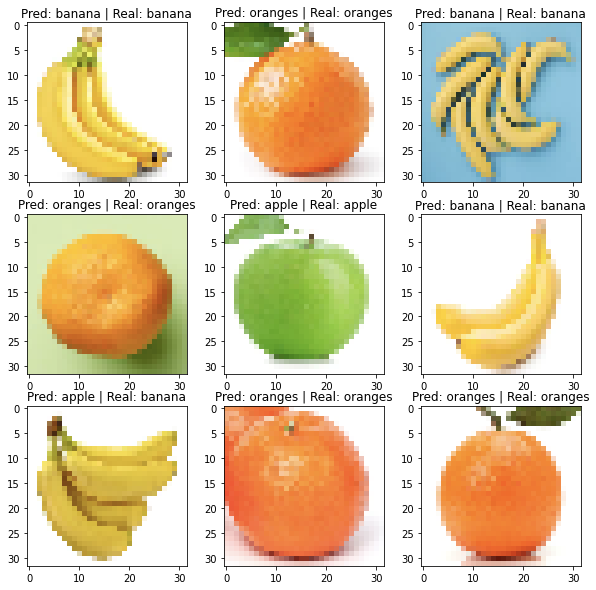

In [14]:
import numpy


plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classification = model(images)
  # print(classification)
  for i in range(9):
    ax = plt.subplot(3, 3, i +1)
    plt.imshow(images[i].numpy().astype('uint8'))
    index = numpy.argmax(classification[i])
    plt.title('Pred: ' + class_names[index] + ' | Real: ' + class_names[labels[i]] )


Print images alongside predictions